# NASA Astroid Classification
### Dataset obtained from: https://www.kaggle.com/datasets/shrutimehta/nasa-asteroids-classification
### We shall classify astroids to be potentially hazardous or non-hazardous

In [1]:
# For reading CSV files
import pandas as pd


# Math package
import numpy as np


# Scikit-Learn 
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# For Plots
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Reading the CSV

In [2]:
Astr_Data = pd.read_csv(r"C:\Users\Viswanath K S\Desktop\nasa.csv")

In [3]:
Astr_Data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


### 2. Analysing the dataset

In [4]:
Astr_Data.isnull().count()

Neo Reference ID                4687
Name                            4687
Absolute Magnitude              4687
Est Dia in KM(min)              4687
Est Dia in KM(max)              4687
Est Dia in M(min)               4687
Est Dia in M(max)               4687
Est Dia in Miles(min)           4687
Est Dia in Miles(max)           4687
Est Dia in Feet(min)            4687
Est Dia in Feet(max)            4687
Close Approach Date             4687
Epoch Date Close Approach       4687
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4687
Miss Dist.(lunar)               4687
Miss Dist.(kilometers)          4687
Miss Dist.(miles)               4687
Orbiting Body                   4687
Orbit ID                        4687
Orbit Determination Date        4687
Orbit Uncertainity              4687
Minimum Orbit Intersection      4687
Jupiter Tisserand Invariant     4687
Epoch Osculation                4687
E

We see that we don't have any missing data or null values

In [5]:
Astr_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

We make the following observations:
1. The column containing the labels ("Hazardous") is of type Bool. We have to convert it to integer.
2. There seem to be correlation between some columns: Estimated diameter, both min and max are expressed in km, m, feet and miles. Similarly relative velocity is expressed in km/s and km/hr. Miss distance is expressed in 4 different units. Since one can convert values from one unit to another, we shall keep the data expressed in a single unit of measurement and drop the remaining.
3. Some columns like Neo Reference ID, Name, Orbit ID, Orbit Determination Date play no role in determining whether the astroid can be classified as hazardous or not. So we shall drop them.

In [6]:
Astr_Data.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


### 3. Visualization

Here, we plot the correlation between the features.

<AxesSubplot:>

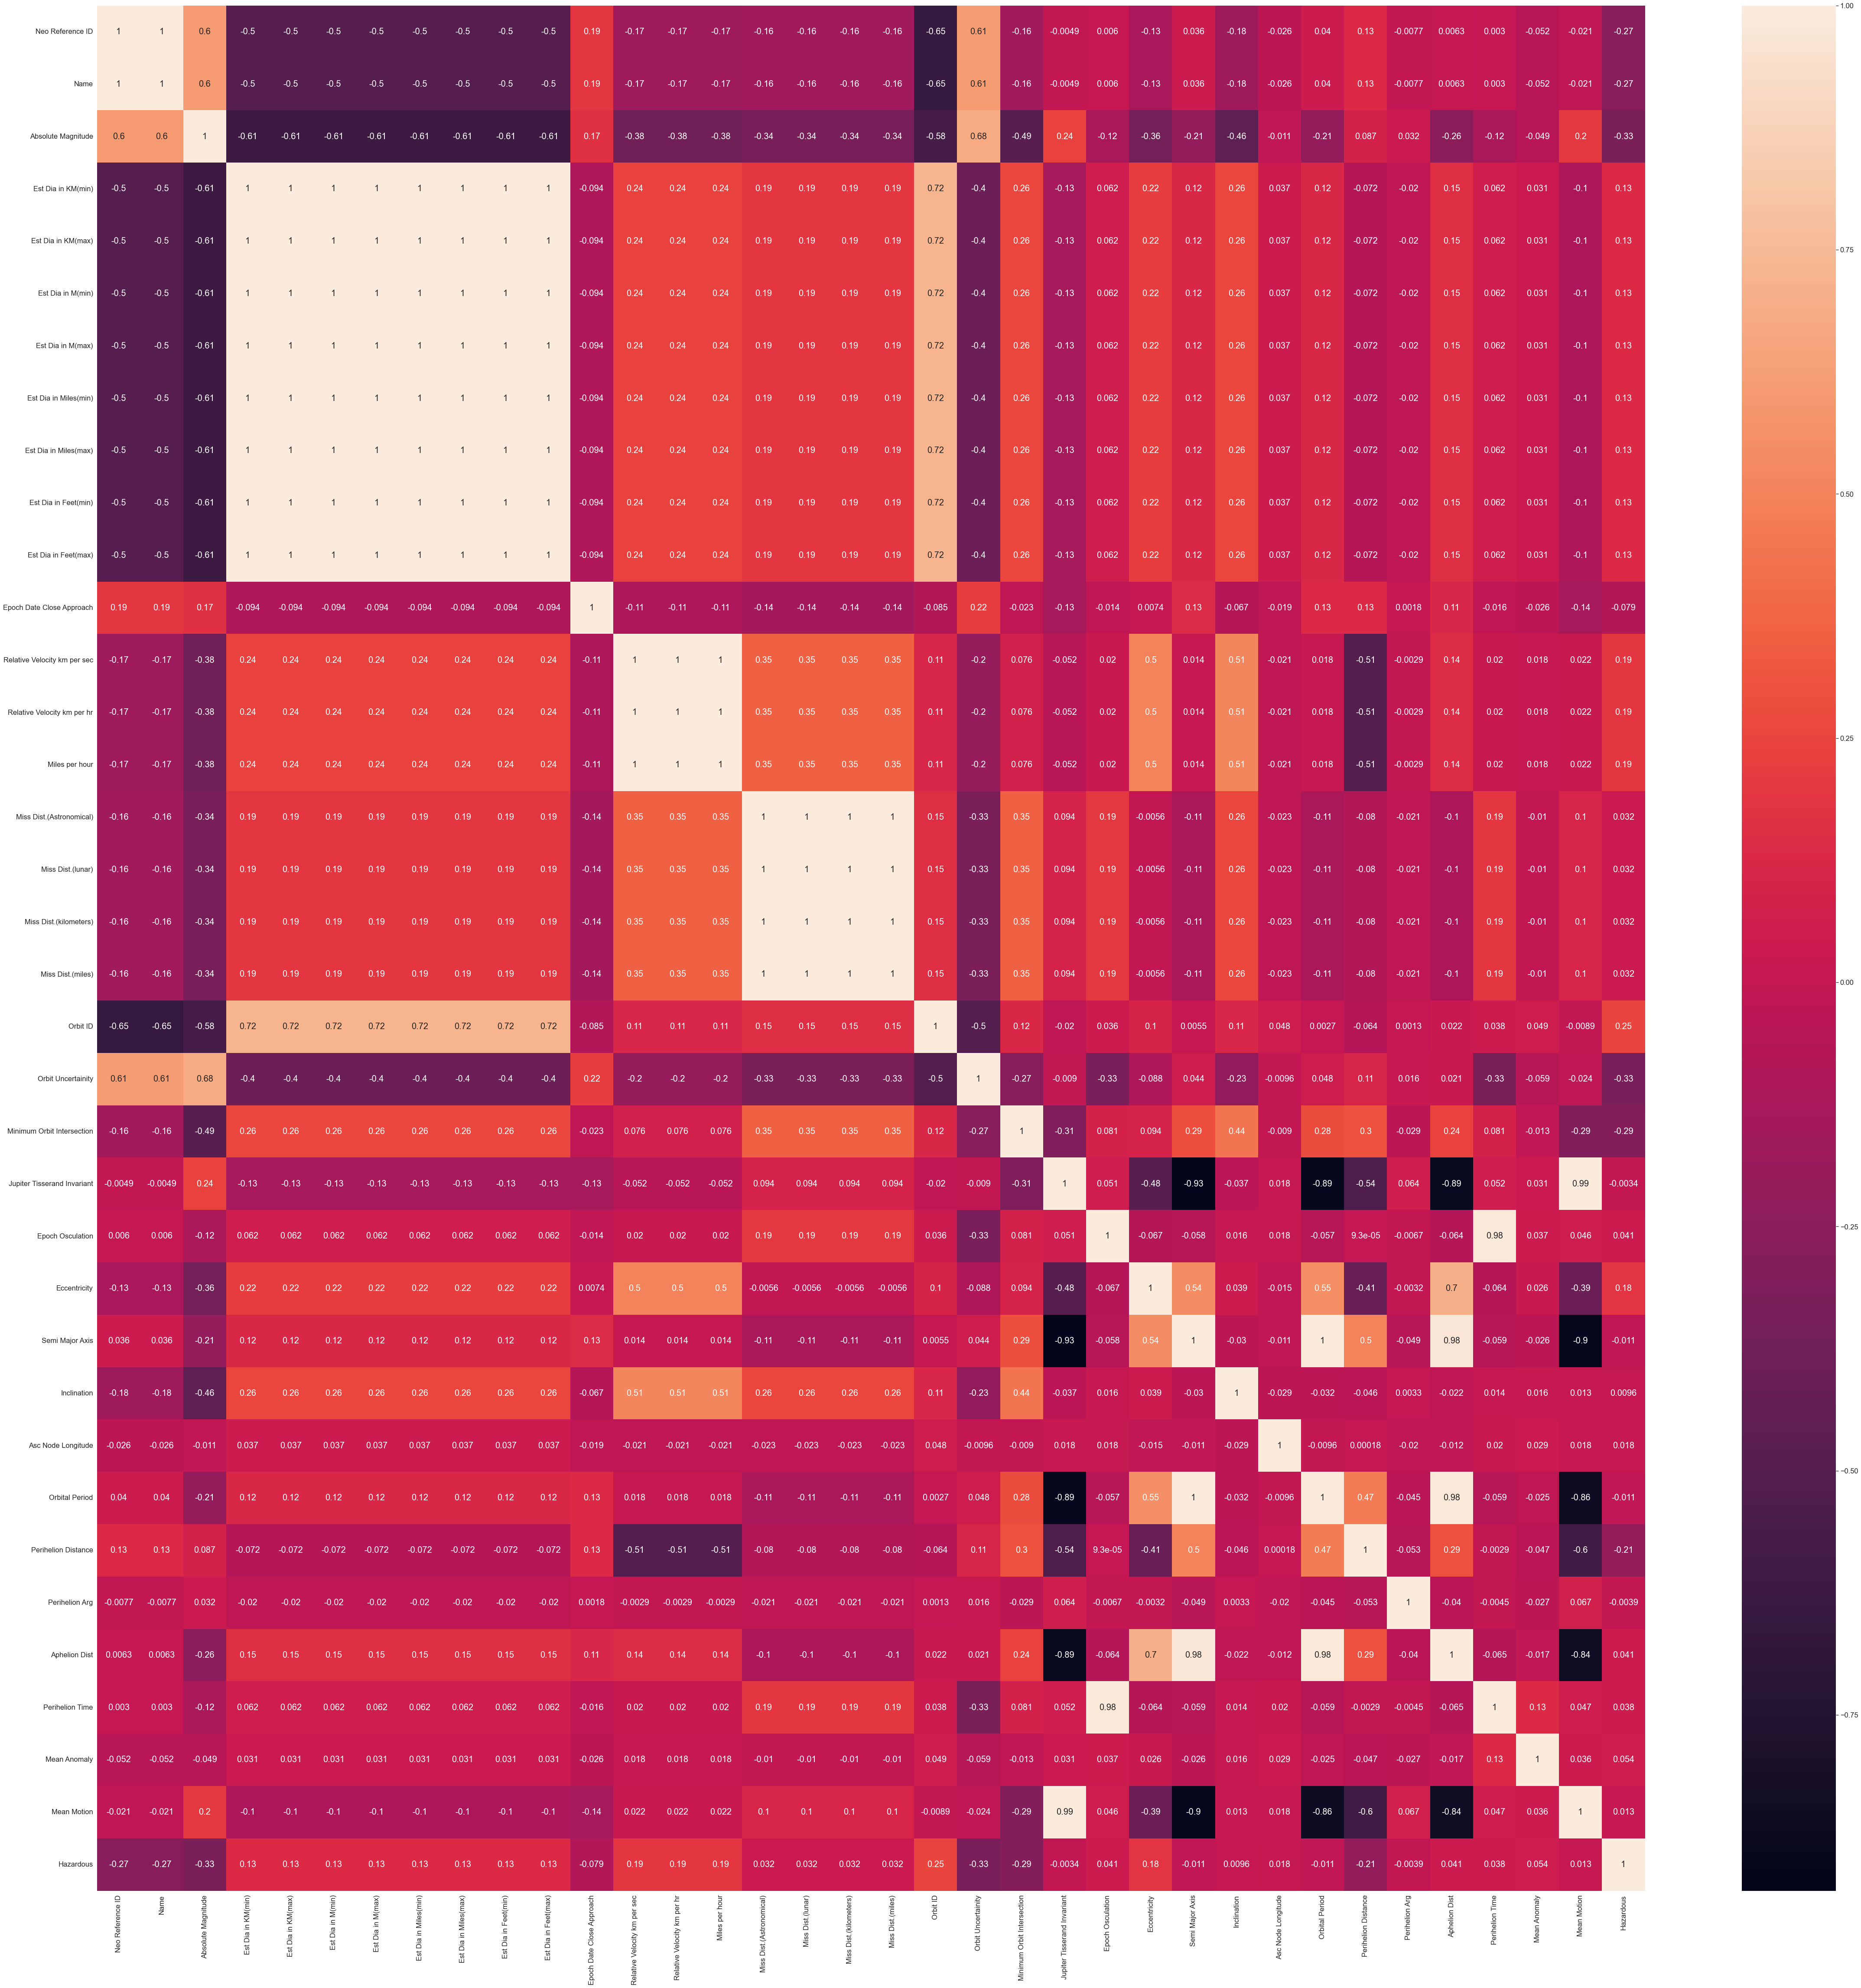

In [7]:
plt.figure(figsize=(80,80))
sns.set(font_scale=1.5)
sns.heatmap(Astr_Data.corr(), annot=True, annot_kws={"size": 20})

Our earlier observation regarding correlations is validated by the heatmap. So we can drop some of those columns.

In [8]:
Astr_Data['Equinox'].value_counts()

J2000    4687
Name: Equinox, dtype: int64

In [9]:
Astr_Data['Orbiting Body'].value_counts()

Earth    4687
Name: Orbiting Body, dtype: int64

Since all the values in columns "Equinox" and "Orbiting Body" are the same, we shall drop those columns as well.

Now we make a list of columns that have to be dropped and create Features Matrix (X) and Labels Vector (y)

In [10]:
col = ['Neo Reference ID', 'Name', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date','Relative Velocity km per sec',
       'Relative Velocity km per sec', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(miles)',
       'Orbiting Body', 'Orbit ID', 'Orbit Determination Date', 'Equinox', 'Hazardous']


We convert the type of elements in "Hazardous" column from bool to int

In [11]:
X = Astr_Data.drop(columns=col)
y = Astr_Data['Hazardous'].astype(int)

We once again check for correlations between features after dropping a few features

<AxesSubplot:>

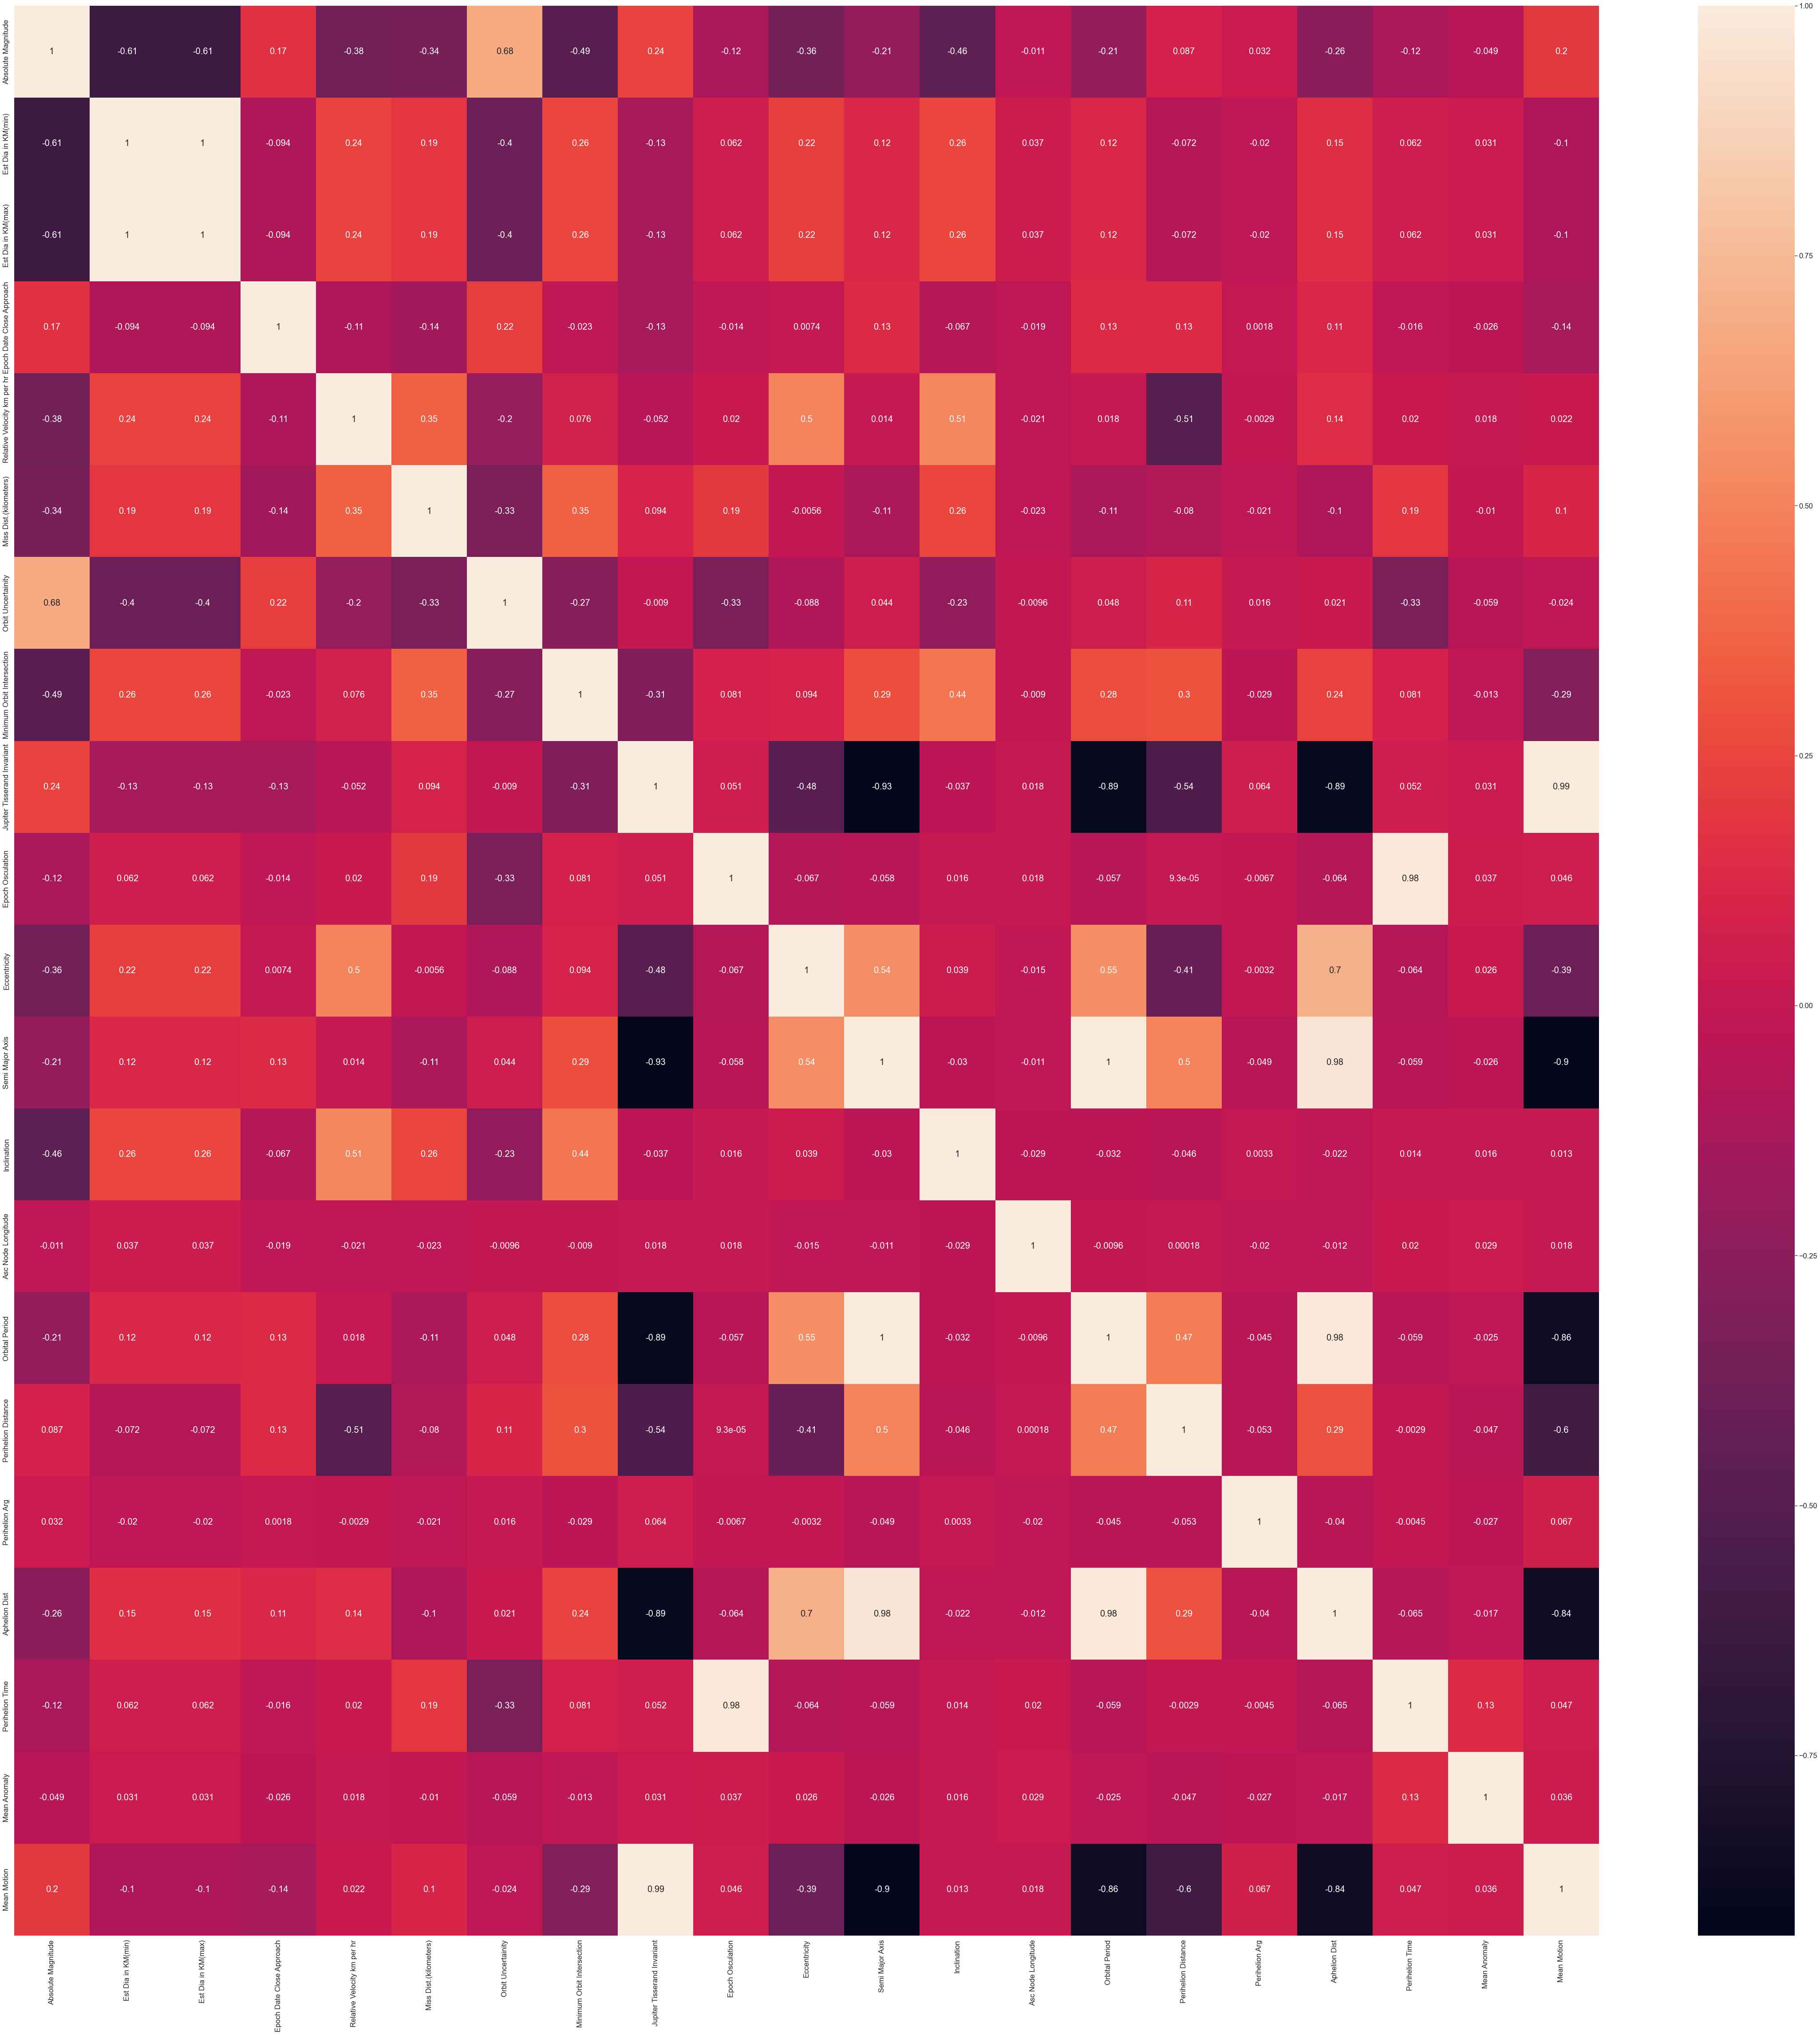

In [12]:
plt.figure(figsize=(80,80))
sns.heatmap(X.corr(), annot=True, annot_kws={"size": 20})

### 3. Model Selection

We shall do the following:
1. Split the dataset into training and test sets.
2. Train using Logistic Regression, Support Vector Machine, K Nearest Neighbour and Random Forest.
3. Evaluate using cross-validation
4. Find out Precision, Recall and Accuracy Scores
5. Choose the best performing model among those.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # train test split

In [14]:
copy_X_train = X_train.copy()
copy_y_train = y_train.copy()

In [15]:
copy_y_train.value_counts()

0    2942
1     573
Name: Hazardous, dtype: int64

In [16]:
Training_Scores = [] # To store the precision, recall and accuracy scores of each model on the training set
Final_Scores = [] # To store the precision, recall and accuracy scores of the best model on training and test set 

#### 3.1 Logistic Regression

In [17]:
log_reg_pipeline = Pipeline([('std_scale', StandardScaler()),('log_reg', LogisticRegression())])
log_reg_pred_value = cross_val_predict(log_reg_pipeline, copy_X_train, copy_y_train, cv=10)
Training_Scores.append(['Logistic Regression',
                       (precision_score(copy_y_train, log_reg_pred_value)*100).round(2),
                       (recall_score(copy_y_train, log_reg_pred_value)*100).round(2),
                       (accuracy_score(copy_y_train, log_reg_pred_value)*100).round(2)])

#### 3.2 Support Vector Machine

In [18]:
svc_pipeline = Pipeline([('std_scale', StandardScaler()),('svc', SVC())])
svc_pred_value = cross_val_predict(svc_pipeline, copy_X_train, copy_y_train, cv=10)
Training_Scores.append(['SVM',
                       (precision_score(copy_y_train, svc_pred_value)*100).round(2),
                       (recall_score(copy_y_train, svc_pred_value)*100).round(2),
                       (accuracy_score(copy_y_train, svc_pred_value)*100).round(2)])

#### 3.3 K Nearest Neighbour

In [19]:
knn_pipeline = Pipeline([('std_scale', StandardScaler()),('knn', KNeighborsClassifier())])
knn_pred_value = cross_val_predict(knn_pipeline, copy_X_train, copy_y_train, cv=10)
Training_Scores.append(['K Nearest Neighbours',
                       (precision_score(copy_y_train, knn_pred_value)*100).round(2),
                       (recall_score(copy_y_train, knn_pred_value)*100).round(2),
                       (accuracy_score(copy_y_train, knn_pred_value)*100).round(2)])

#### 3.4 Random Forest

In [20]:
ran_for_clf = RandomForestClassifier()
ran_for_pred_value = cross_val_predict(ran_for_clf, copy_X_train, copy_y_train, cv=10)
Training_Scores.append(['Random Forest',
                       (precision_score(copy_y_train, ran_for_pred_value)*100).round(2),
                       (recall_score(copy_y_train, ran_for_pred_value)*100).round(2),
                       (accuracy_score(copy_y_train, ran_for_pred_value)*100).round(2)])

In [21]:
column_names = ['Name', 'Precision Score', 'Recall Score', 'Accuracy Score']

##### Summary of the models' performance on the training set:

In [22]:
Training_DF = pd.DataFrame(Training_Scores, columns = column_names)
Training_DF

,Name,Precision Score,Recall Score,Accuracy Score
0,Logistic Regression,85.94,85.34,95.33
1,SVM,86.41,77.66,94.37
2,K Nearest Neighbours,72.58,53.58,89.13
3,Random Forest,99.29,98.25,99.60


### 4. Fine Tuning and Training Random Forest Model

In [23]:
param_grid = {'max_depth': np.arange(1,25,1),
             'n_estimators': np.arange(1,20,1)}
rf_gridcv = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, cv=10)

In [24]:
rf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [25]:
Predicted_Value = rf_gridcv.predict(X_test)
Final_Scores.append(['Training-->', (precision_score(copy_y_train, ran_for_pred_value)*100).round(2),
                       (recall_score(copy_y_train, ran_for_pred_value)*100).round(2),
                       (accuracy_score(copy_y_train, ran_for_pred_value)*100).round(2)])
Final_Scores.append(['Test-->',(precision_score(y_test, Predicted_Value)*100).round(2),
                       (recall_score(y_test, Predicted_Value)*100).round(2),
                       (accuracy_score(y_test, Predicted_Value)*100).round(2)])


##### Final Scores: 

In [26]:
Final_DF = pd.DataFrame(Final_Scores, columns = column_names)
Final_DF

,Name,Precision Score,Recall Score,Accuracy Score
0,Training-->,99.29,98.25,99.60
1,Test-->,97.28,98.35,99.32
